In [20]:
# Installed
import xarray as xr
import sys, os
#from Functions.data_functions import *

# Local Imports
curdir = os.getcwd()
sys.path.insert(0, curdir+"/../Functions")
# My built function imports
from data_functions import *
from plotting_functions import *

current_month_folder="June22"
data_path = "/Users/mawa7160/dev/data/CERES/EBAF/"

file_name = data_path+"CERES_EBAF-TOA_Full_2022_01.nc"
ds = xr.open_dataset(file_name)
full_years = ds

zone_data = create_CERES_EBAF_zonal_data(ds, "toa_sw_all_mon", 20)
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180, time: 263)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2022-01-15
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_c_mon             (time, lat, lon) float32 ...
    toa_lw_clr_c_mon             (time, lat, lon) float32 ...
    toa_net_clr_c_mon            (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

 -0.035 W/m^2 per Year. With R^2 0.08342721799074151
 -0.035 W/m^2 per Year. With R^2 0.11144125980262333
 -0.03 W/m^2 per Year. With R^2 0.0870923773696925
 -0.021 W/m^2 per Year. With R^2 0.05161260396148946
 -0.026 W/m^2 per Year. With R^2 0.09090765708228679
 -0.032 W/m^2 per Year. With R^2 0.16412322151037748
 -0.035 W/m^2 per Year. With R^2 0.2022112094582249
 -0.042 W/m^2 per Year. With R^2 0.29642013724600125
 -0.046 W/m^2 per Year. With R^2 0.33322237422195344
 -0.051 W/m^2 per Year. With R^2 0.3418226769389038
 -0.052 W/m^2 per Year. With R^2 0.3324598075225671
 -0.041 W/m^2 per Year. With R^2 0.21941153222904838
 -0.077 W/m^2 per Year. With R^2 0.39800932276253215
 -0.104 W/m^2 per Year. With R^2 0.5790540675348715
 -0.103 W/m^2 per Year. With R^2 0.5741176010578329
 -0.121 W/m^2 per Year. With R^2 0.6176772519903263
 -0.103 W/m^2 per Year. With R^2 0.4618029744412618
 -0.103 W/m^2 per Year. With R^2 0.3812551600656569
 -0.08 W/m^2 per Year. With R^2 0.2691642025693905
 -0.0

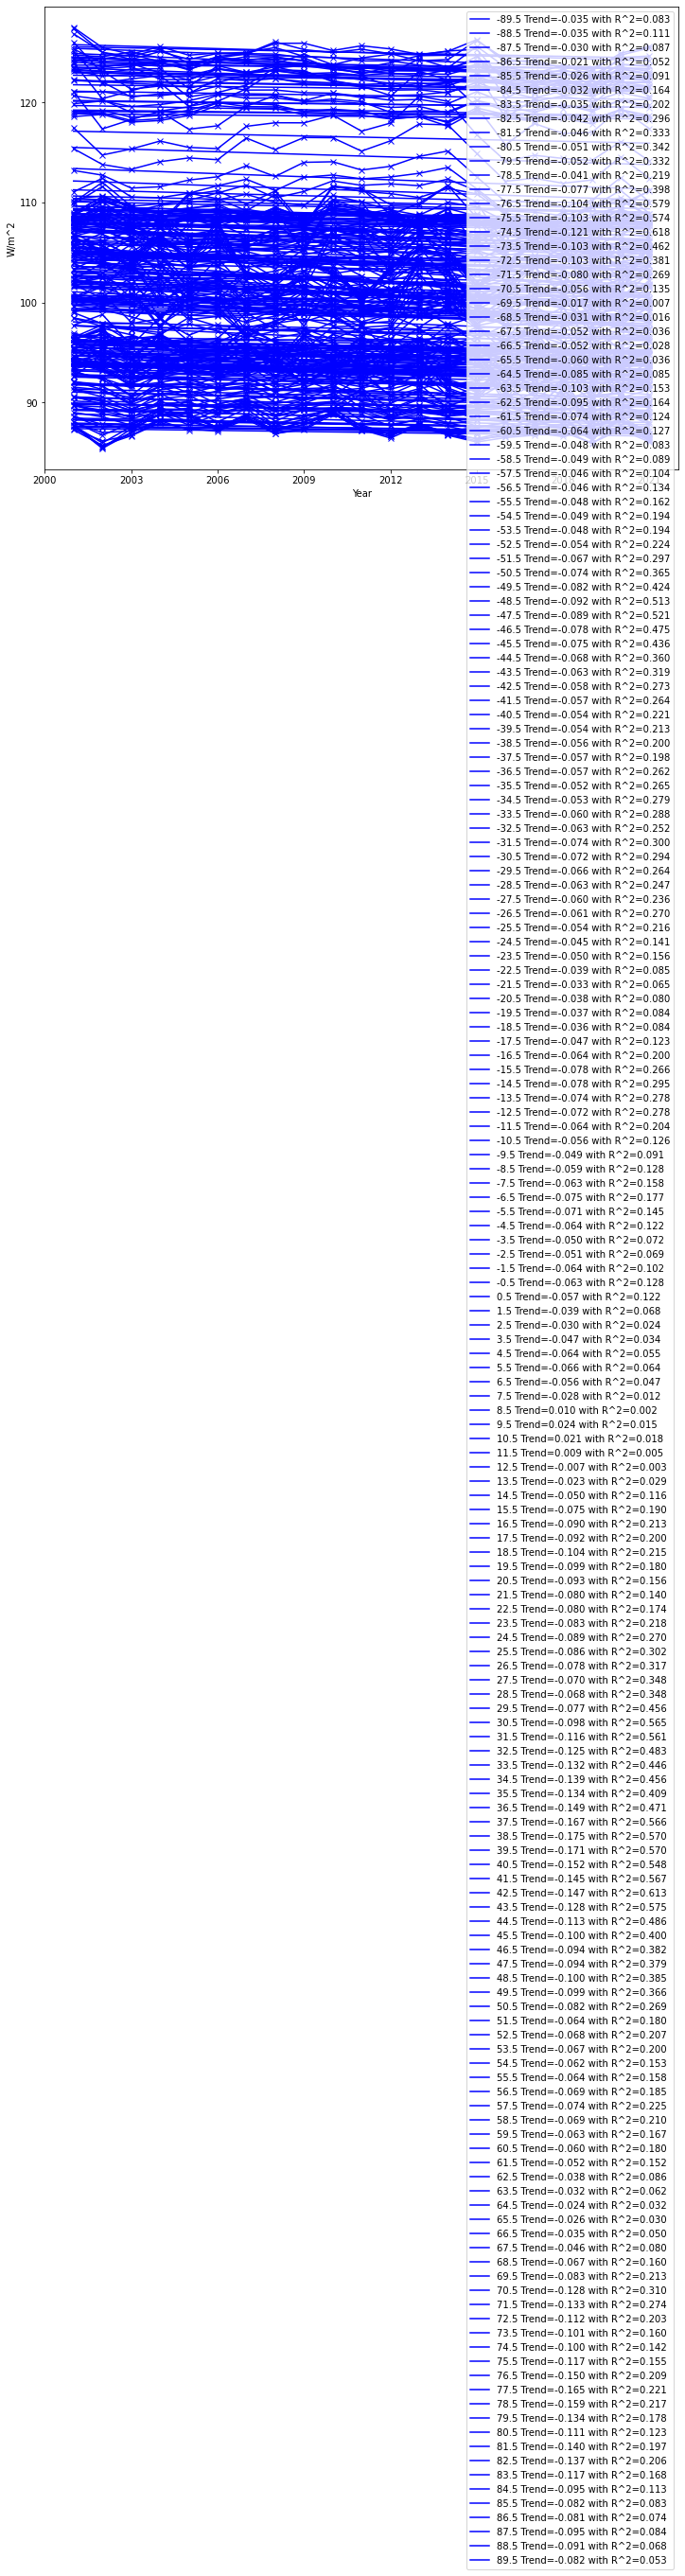

In [5]:
plot_zonal_averaged_data_by_year(zone_data)

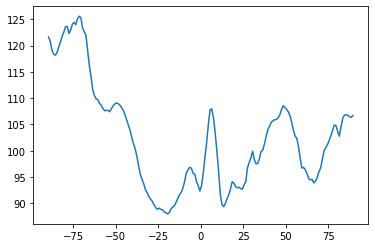

In [19]:
plot_single_year_by_latitude_from_zonal_average(zone_data, 2004)

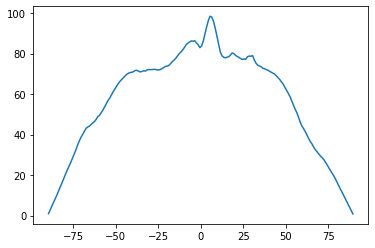

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data_path = "/Users/mawa7160/dev/data/CERES/"
lat_weights = pd.read_csv(data_path+"lat_weights.csv", header=0)
lat_weights = lat_weights.to_numpy()

lats = lat_weights[0:-1, 0]
lats = lats.astype(float)
vals = lat_weights[0:-1, 1]
vals = vals.astype(float)

weights = vals*zone_data.sel(year=2001).mean().data

plt.plot(zone_data.lat, zone_data.sel(year=2001)*weights)

In [ ]:
# Try weighting by cosine of latitude

# Calculate total energy in Watts (weight by area of band)